### Problem 3: Stochastic Gradient Descent (30 points)

In class we covered the baseline stochastic gradient descent.  Using the linear regression example from the class notes, develop from scratch the baseline SGD algorithm. :

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

In [31]:
%matplotlib inline
import math
import tensorflow as tf
from d2l import tensorflow as d2l

epoch 50, x1: -0.037537, x2: -0.150094
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36898/3425602866.py", line 20, in <module>
    d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))
  File "/opt/conda/lib/python3.11/site-packages/d2l/tensorflow.py", line 1289, in show_trace_2d
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
  File "/opt/conda/lib/python3.11/site-packages/matplotlib/pyplot.py", line 3578, in plot
  File "/opt/conda/lib/python3.11/site-packages/matplotlib/axes/_axes.py", line 1721, in plot
    Parameters
            ^^^
  File "/opt/conda/lib/python3.11/site-packages/matplotlib/axes/_base.py", line 303, in __call__
    # Repeatedly grab (x, y) or (x, y, format) from the front of args and
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/matplotlib

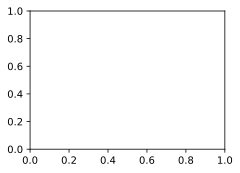

In [44]:
def f(x1, x2):  # Objective function
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):  # Gradient of the objective function
    return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # Simulate noisy gradient
    g1 += tf.random.normal([1], 0.0, 1)
    g2 += tf.random.normal([1], 0.0, 1)
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def constant_lr():
    return 1

eta = 0.1
lr = constant_lr  # Constant learning rate
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

### Problem 4: SGD Enhancements (30 points)

In this exercise you will implement some enhancements for the linear regression problem from scratch that can improve the convergence speed of the algorithm.

1. Momentum (15 points)
2. Adam (15 points)

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and compared to the baseline SGD algorithm. You can include all plots in the same figure.

# Momentum

In [ ]:
def init_momentum_states(features_dim):
    v_w = tf.Variable(tf.zeros((features_dim, 1)))
    v_b = tf.Variable(tf.zeros(1))
    return (v_w, v_b)

def sgd_momentum(params, grads, states, hyperparams):
    for p, v, g in zip(params, states, grads):
            v[:].assign(hyperparams['momentum'] * v + g)
            p[:].assign(p - hyperparams['lr'] * v)

loss: 0.243, 0.379 sec/epoch


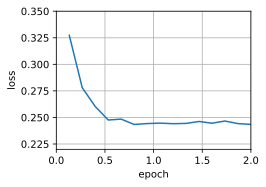

In [ ]:
def train_momentum(lr, momentum, num_epochs=2):
    d2l.train_ch11(sgd_momentum, init_momentum_states(feature_dim),
                   {'lr': lr, 'momentum': momentum}, data_iter,
                   feature_dim, num_epochs)

data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
train_momentum(0.02, 0.5)

# Adam

In [ ]:
%matplotlib inline
import tensorflow as tf
from d2l import tensorflow as d2l


def init_adam_states(feature_dim):
    v_w = tf.Variable(tf.zeros((feature_dim, 1)))
    v_b = tf.Variable(tf.zeros(1))
    s_w = tf.Variable(tf.zeros((feature_dim, 1)))
    s_b = tf.Variable(tf.zeros(1))
    return ((v_w, s_w), (v_b, s_b))

def adam(params, grads, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s), grad in zip(params, states, grads):
        v[:].assign(beta1 * v  + (1 - beta1) * grad)
        s[:].assign(beta2 * s + (1 - beta2) * tf.math.square(grad))
        v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
        s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
        p[:].assign(p - hyperparams['lr'] * v_bias_corr
                    / tf.math.sqrt(s_bias_corr) + eps)

loss: 0.244, 0.524 sec/epoch


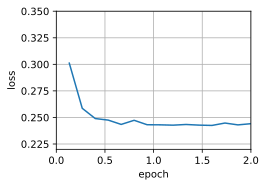

In [ ]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adam, init_adam_states(feature_dim),
               {'lr': 0.01, 't': 1}, data_iter, feature_dim);

loss: 0.243, 0.556 sec/epoch


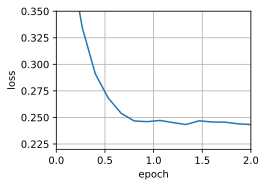

In [ ]:
trainer = tf.keras.optimizers.Adam
d2l.train_concise_ch11(trainer, {'learning_rate': 0.01}, data_iter)